In [46]:
import numpy as np
import matplotlib.pyplot as plt

### Константы

In [40]:
elem_number = 100
tetta = 3
betta = 0.95

In [5]:
def pareto(x, tetta):
    return (tetta - 1) / x ** tetta

In [17]:
distribution = np.array([pareto(x, tetta) for x in np.random.sample(elem_number)])
print(distribution)

[1.12818914e+01 7.75827424e+00 2.67997995e+01 1.27891100e+03
 6.31830411e+00 1.43867549e+04 3.92718090e+00 6.38993685e+01
 4.77111713e+00 6.64602963e+00 4.22851772e+02 2.45943624e+00
 1.32583717e+01 2.12232795e+02 3.82347909e+00 6.79678557e+00
 1.01469071e+01 8.24257599e+00 7.67189988e+05 3.92738428e+01
 2.21380358e+00 8.28369306e+01 3.10256396e+00 2.27904077e+00
 5.15333440e+00 9.13669734e+00 1.76269144e+01 4.79210907e+00
 2.15811809e+04 2.10517585e+02 2.59770419e+03 9.28111881e+00
 3.09238847e+00 1.85768506e+04 4.26479534e+01 8.09715795e+00
 4.88886619e+00 2.88051976e+00 1.87776004e+01 2.05663485e+00
 9.96634702e+00 4.51118577e+00 1.27599005e+05 2.68874136e+00
 4.09525211e+02 2.17341605e+01 3.72317943e+02 2.34817238e+00
 1.17946930e+01 7.17679230e+04 6.77214826e+00 1.31905110e+04
 1.09828547e+01 3.98301477e+00 6.58349569e+00 8.77882711e+00
 6.89525481e+00 1.93344963e+01 6.51103930e+01 5.89583829e+00
 5.18136497e+00 2.26874426e+01 8.26719978e+02 8.16984325e+01
 2.98315434e+00 2.315230

### Медиана

In [38]:
tetta_estim = np.round(elem_number / np.sum(np.log(distribution)) + 1, 3)

# tetta_estim = 3
# Если взять тэтту за 3, как задавал, то получается правдоподобный интервал для медианы
right = np.round(-(-1.96 / np.sqrt(elem_number) * np.sqrt(2 ** (2 / (tetta_estim - 1)) \
        * np.log(2) ** 2 / (tetta_estim ** 2 - 4 * tetta_estim + 5))) + 2 * (1 / (tetta_estim - 1)), 3)
left = np.round(-(1.96 / np.sqrt(elem_number) * np.sqrt(2 ** (2 / (tetta_estim - 1)) \
        * np.log(2) ** 2 / (tetta_estim ** 2 - 4 * tetta_estim + 5))) + 2 * (1 / (tetta_estim - 1)), 3)

print(f"Tetta_estim - {tetta_estim}")
print(f"Interval for med - ({left}, {right})")

Tetta_estim - 1.269
Interval for med - (5.992, 8.878)


### Тэтта

In [34]:
fisher = np.sqrt((tetta_estim - 1) ** 4 / (tetta_estim ** 2 - 4 * tetta_estim + 5))

right0 = np.round(-(-1.96 / np.sqrt(elem_number) * fisher + 1 + elem_number / np.sum(np.log(distribution))), 3)
left0 = np.round(-(1.96 / np.sqrt(elem_number) * fisher + 1 + elem_number / np.sum(np.log(distribution))), 3)

print(f"Interval for tetta - ({left0}, {right0})")

Interval for tetta - (-1.28, -1.257)


### Непараметрический бутстрап

In [47]:
N = 1000
btstrp_delta = np.array([])

def find_tetta(arr, N):
    return np.round(N / np.sum(np.log(arr)) + 1, 3)

for _ in range(N):
    temp = np.random.choice(distribution, len(distribution))
    btstrp_delta = np.append(btstrp_delta, find_tetta(temp, elem_number))
btstrp_delta = np.sort(btstrp_delta)

left_non_param = np.abs(np.round(btstrp_delta[int((1 - betta) / 2 * N)], 3))
rigth_non_param = np.round(btstrp_delta[int((1 + betta) / 2 * N)], 3)

print(f"Param bootstrap interval - ({left_non_param}, {rigth_non_param})")

Param bootstrap interval - (1.23, 1.318)


### Параметрический бутстрап

In [48]:
n = 50000
param_btstrp_delta = np.array([])

for _ in range(n):
    temp = np.array([pareto(x, tetta) for x in np.random.sample(elem_number)])
    param_btstrp_delta = np.append(param_btstrp_delta, find_tetta(temp, elem_number))
param_btstrp_delta = np.sort(param_btstrp_delta)

left_param = np.abs(np.round(btstrp_delta[int((1 - betta) / 2 * N)], 3))
rigth_param = np.round(btstrp_delta[int((1 + betta) / 2 * N)], 3)

print(f"Param bootstrap interval - ({left_param}, {rigth_param})")

Param bootstrap interval - (1.23, 1.318)


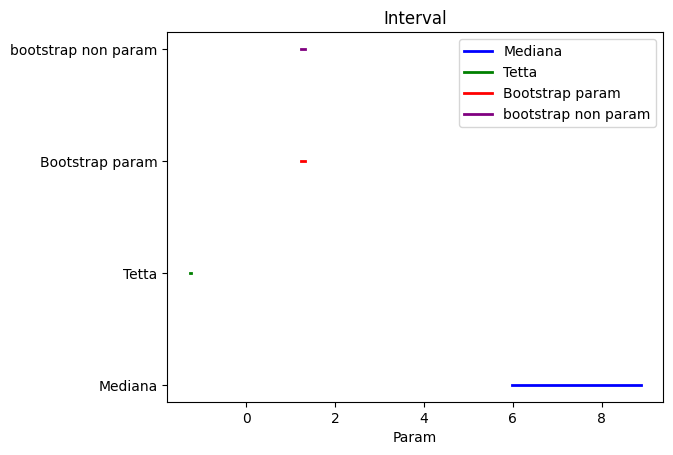

In [ ]:
x1 = np.linspace(left, right, 100)
y1 = [1] * 100

x2 = np.linspace(left0, right0, 100)
y2 = [2] * 100

x3 = np.linspace(left_param, rigth_param, 100)
y3 = [3] * 100

x4 = np.linspace(left_non_param, rigth_non_param, 100)
y4 = [4] * 100

plt.plot(x1, y1, label="Точный", color="blue", linewidth=2)
plt.plot(x2, y2, label="Асимптотический", color="green", linewidth=2)
plt.plot(x3, y3, label="Бутстрап", color="red", linewidth=2)
plt.plot(x4, y4, label="Бутрстрап непараметрический", color="purple", linewidth=2)

plt.legend(["Mediana", "Tetta", "Bootstrap param", "bootstrap non param"])
plt.yticks([1, 2, 3, 4], ["Mediana", "Tetta", "Bootstrap param", "bootstrap non param"])
plt.xlabel("Param")
plt.title("Interval")

plt.show()